In [6]:
import osmnx as ox
import pandas as pd
import geocoder
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import streamlit as st
from streamlit_folium import folium_static
import matplotlib.pyplot as plt 
import datetime
import warnings
warnings.filterwarnings('ignore')

In [7]:
from prophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [8]:
df_acum= pd.read_excel('df_definitivo.xlsx')

In [9]:
df_acum_copia= df_acum
df_acum_copia

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción
0,ALBACETE,ABENGIBRE,ABENGIBRE,2250,"AVENIDA CASTILLA LA MANCHA, 26","-1,539167","39,211417","1,799",No disponible,No disponible,"1,829",No disponible,Nº 10.935,L-D: 07:00-22:00,04-04-2022
1,ALBACETE,ALATOZ,ALATOZ,2152,"CR CM-332, 46,4","-1,346083","39,100389","1,869",No disponible,"2,000","1,950","2,000",REPSOL,L-D: 7:00-23:00,04-04-2022
2,ALBACETE,ALBACETE,ALBACETE,2001,"CALLE FEDERICO GARCIA LORCA, 5","-1,846361","38,997722",No disponible,No disponible,No disponible,"1,889",No disponible,CEPSA,L-S: 05:00-23:00,04-04-2022
3,ALBACETE,ALBACETE,ALBACETE,2001,"AVENIDA 1º DE MAYO, S/N","-1,868500","38,985667","1,809",No disponible,"1,899","1,829","1,859",CARREFOUR,L-S: 08:00-22:00; D: 09:00-21:00,04-04-2022
4,ALBACETE,ALBACETE,ALBACETE,2001,CALLE PRINCIPE DE ASTURIAS (POLÍGONO DE ROMICA...,"-1,832000","39,054694","1,769",No disponible,"1,911","1,849","1,939",BP ROMICA,L-D: 06:00-21:30,04-04-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244785,ZARAGOZA,Zaragoza,ZARAGOZA,50197,"RONDA FERIA DE MUESTRAS, DE LA, 20","-0,986389","41,637944",No disponible,No disponible,No disponible,"1,869",No disponible,IDS,L-D: 24H,28-04-2022
244786,ZARAGOZA,Zaragoza,ZARAGOZA,50197,"POLIGONO CALLE TURIASO, 31","-0,974194","41,645722",No disponible,No disponible,No disponible,"1,889",No disponible,NOIL,L-D: 24H,28-04-2022
244787,ZARAGOZA,Zuera,ZUERA,50800,"CARRETERA N-330A KM. 24,000","-0,794000","41,857000","1,849",No disponible,"1,979","1,869","1,939",REPSOL,L-D: 06:00-22:00,28-04-2022
244788,ZARAGOZA,Zuera,ZUERA,50800,"CALLE AUSTRIA, 11,17","-0,782833","41,883583","1,799",No disponible,No disponible,"1,825","1,865",COOPERATIVA SAN LICER,L-D: 24H,28-04-2022


In [10]:
df_acum_copia['Precio gasolina 95 E5'] = df_acum_copia['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
df_acum_copia.drop(df_acum_copia.loc[df_acum_copia['Precio gasolina 95 E5']=='No disponible'].index, inplace=True)

df_acum_copia['Precio gasolina 95 E5']=df_acum_copia['Precio gasolina 95 E5'].astype('float64')


In [52]:
df_acum_copia

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción
0,ALBACETE,ABENGIBRE,ABENGIBRE,2250,"AVENIDA CASTILLA LA MANCHA, 26","-1,539167","39,211417",1.799,No disponible,No disponible,"1,829",No disponible,Nº 10.935,L-D: 07:00-22:00,04-04-2022
1,ALBACETE,ALATOZ,ALATOZ,2152,"CR CM-332, 46,4","-1,346083","39,100389",1.869,No disponible,"2,000","1,950","2,000",REPSOL,L-D: 7:00-23:00,04-04-2022
3,ALBACETE,ALBACETE,ALBACETE,2001,"AVENIDA 1º DE MAYO, S/N","-1,868500","38,985667",1.809,No disponible,"1,899","1,829","1,859",CARREFOUR,L-S: 08:00-22:00; D: 09:00-21:00,04-04-2022
4,ALBACETE,ALBACETE,ALBACETE,2001,CALLE PRINCIPE DE ASTURIAS (POLÍGONO DE ROMICA...,"-1,832000","39,054694",1.769,No disponible,"1,911","1,849","1,939",BP ROMICA,L-D: 06:00-21:30,04-04-2022
5,ALBACETE,ALBACETE,ALBACETE,2001,"CALLE FEDERICO GARCIA LORCA, 1","-1,849833","39,000861",1.677,No disponible,No disponible,"1,757",No disponible,PLENOIL,L-D: 24H,04-04-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233143,ZARAGOZA,Zaragoza,VILLARRAPA,50692,"AUTOVIA A-68 KM. 258,25","-1,078944","41,740389",1.839,No disponible,"1,949","1,859","1,929",REPSOL,L-V: 05:00-22:00; S-D: 08:00-22:00,27-04-2022
233144,ZARAGOZA,Zaragoza,ZARAGOZA,50197,"AVENIDA DIAGONAL PLAZA, 22","-0,990111","41,636528",1.849,No disponible,"1,989","1,869","1,929",REPSOL,L-V: 06:00-22:00; S: 08:00-15:00,27-04-2022
233147,ZARAGOZA,Zuera,ZUERA,50800,"CARRETERA N-330A KM. 24,000","-0,794000","41,857000",1.819,No disponible,"1,949","1,849","1,919",REPSOL,L-D: 06:00-22:00,27-04-2022
233148,ZARAGOZA,Zuera,ZUERA,50800,"CALLE AUSTRIA, 11,17","-0,782833","41,883583",1.799,No disponible,No disponible,"1,809","1,849",COOPERATIVA SAN LICER,L-D: 24H,27-04-2022


In [67]:
df_todas_gasolineras = df_acum.groupby(["Fecha de extracción"])["Precio gasolina 95 E5"].median()
df_prophet_espana=pd.DataFrame(df_todas_gasolineras).reset_index()
df_prophet_espana.columns = ['ds', 'y']
df_prophet_espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      20 non-null     object 
 1   y       20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [68]:
#df_grafico[0]['Precio gasolina 95 E5'] = df_grafico[0]['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
#df_grafico[0]['Precio gasóleo A'] = df_grafico[0]['Precio gasóleo A'].apply(lambda x: x.replace(',','.'))
#df_grafico[0]['Precio gasolina 95 E5']=df_grafico[0]['Precio gasolina 95 E5'].astype('float64')
#df_grafico[0]['Precio gasóleo A']=df_grafico[0]['Precio gasóleo A'].astype('float64')

In [69]:
format_data = '%d-%m-%Y'
df_prophet_espana['ds']=df_prophet_espana['ds'].apply(lambda x: datetime.datetime.strptime(x,format_data))


In [71]:
df_prophet_espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      20 non-null     datetime64[ns]
 1   y       20 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 448.0 bytes


In [74]:
my_model = Prophet(interval_width=0.8, daily_seasonality=True)

In [75]:
my_model.fit(df_prophet_espana)

2022-04-27 20:37:53.272 INFO    prophet: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-04-27 20:37:53.308 INFO    prophet: n_changepoints greater than number of observations. Using 15.


In [80]:
future = my_model.make_future_dataframe(periods=7)
future

,ds
0,2022-04-04
1,2022-04-05
2,2022-04-09
3,2022-04-10
4,2022-04-11
5,2022-04-12
6,2022-04-14
7,2022-04-15
8,2022-04-16
9,2022-04-17


In [81]:
 predict= my_model.predict(future)

In [84]:
predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9)

,ds,yhat,yhat_lower,yhat_upper
18,2022-04-26,1.839000,1.839000,1.839000
19,2022-04-27,1.829000,1.829000,1.829000
20,2022-04-28,1.833479,1.831579,1.835767
21,2022-04-29,1.841795,1.833402,1.850356
22,2022-04-30,1.846708,1.830433,1.863195
23,2022-05-01,1.849708,1.821632,1.875721
24,2022-05-02,1.850708,1.811095,1.887692
25,2022-05-03,1.850708,1.800440,1.900512
26,2022-05-04,1.840708,1.776831,1.905029


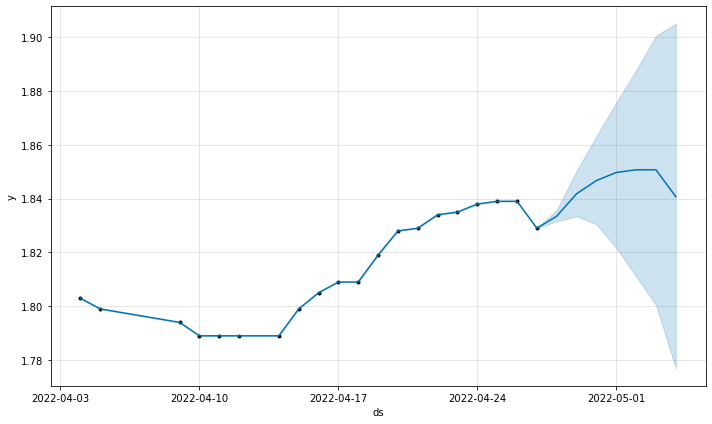

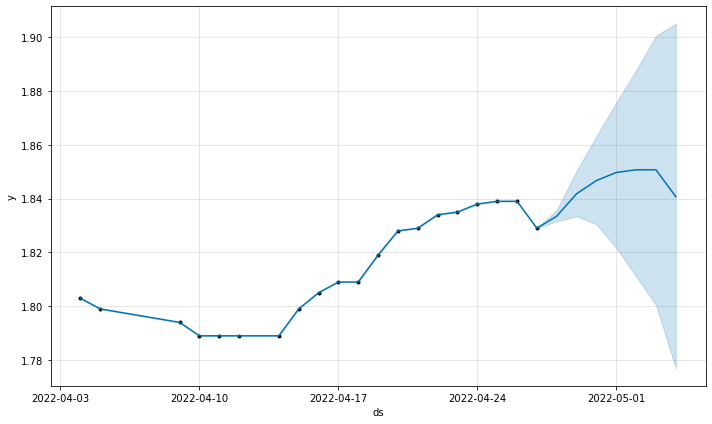

In [83]:
my_model.plot(predict, uncertainty=True)

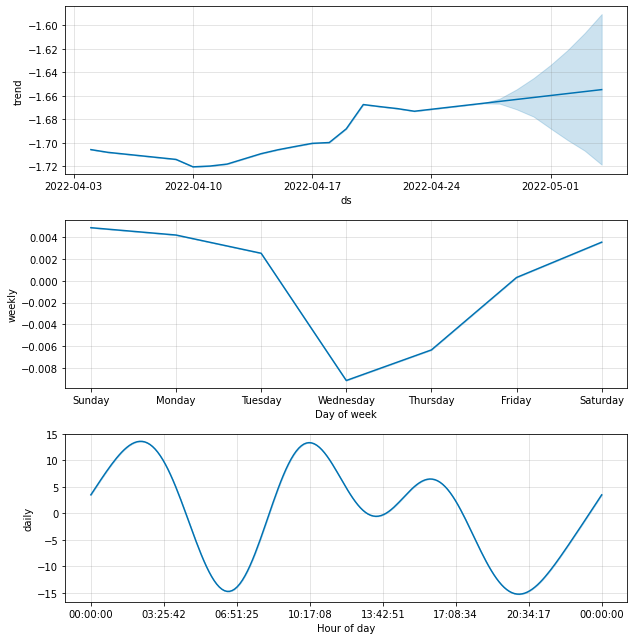

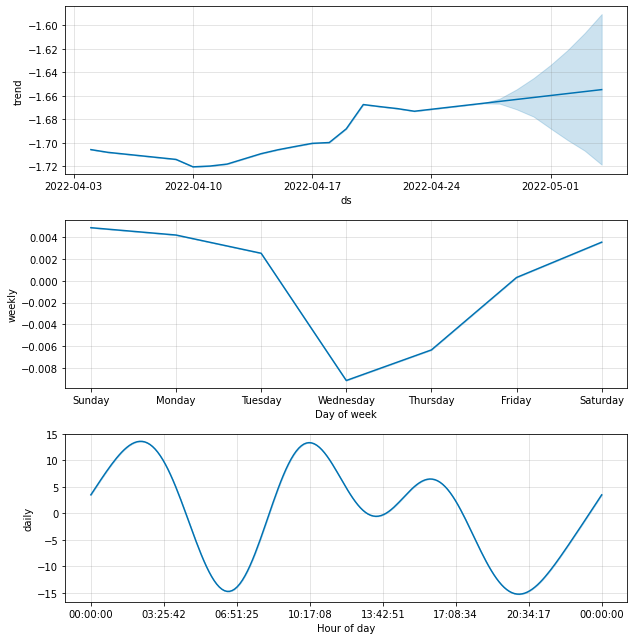

In [85]:
my_model.plot_components(predict)